# Hashing for integrity

## 1. Introduction

### 1.1. Abstract

A hash function maps bit-strings of arbitrary finite length to strings of fixed length. Calculation have to be easy independently of the size of the input. The hash-value serves as a compact representative image of an input (called message digest). Hash functions are used for data integrity in conjunction with digital signature sch-
emes (Van Oorschot, Paul C., Alfred J. Menezes, and Scott A. Vanstone. Handbook of applied cryptography. CRC press, 1996). <br>
This notebook will introduce you to the basic ideas of the practical use of some popular hash algorithms.

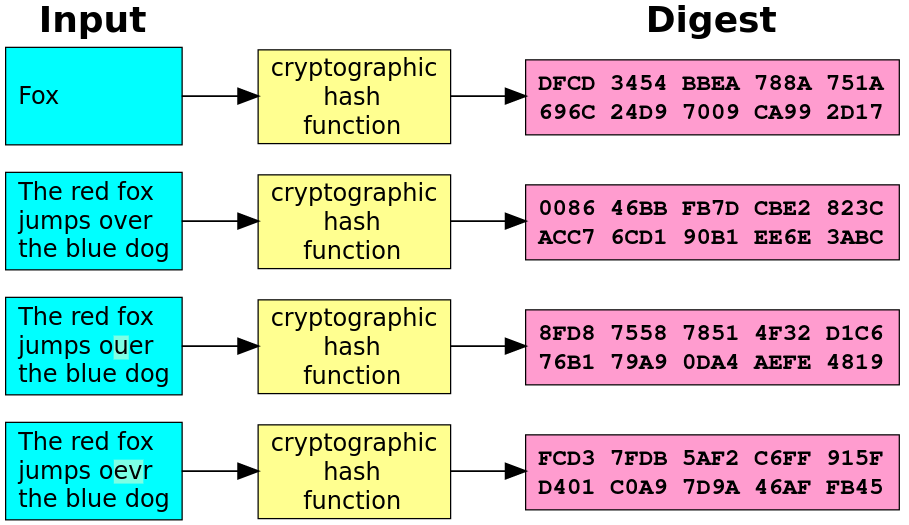

A small change in the input (in the word "over") drastically changes the output (digest).<br>

### 1.2. Algorithms used

<b>MD5: </b>It is a cryptographic hash function that produce a 128-bit hash value. It was broken but still widely used.<br>
<b>SHA-2 (Secure Hash Algorithm 2): </b> Is a set of cryptographic hash functions designed by the NSA. Consists of six hash functions with digests (hash values) that are 224, 256, 384 or 512 bits: SHA-224, SHA-256, SHA-384, SHA-512, SHA-512/224, SHA-512/256. <br>
In this notebook, we use: MD5, SHA-256 and SHA-384

<i>Source and Image: Wikipedia. Link: </i> https://en.wikipedia.org/wiki/Cryptographic_hash_function#/media/File:Cryptographic_Hash_Function.svg

### 1.3. In this notebook

First a basic example of hashing a string. Continues with hashing of a file. It finish with a comparison of performance of hashing files with different size using mentioned algorithms.

## 2. Hashing a String

#### Libraries

In [1]:
#%pip install pandas

In [3]:
import os
from os import system
import pandas as pd
import datetime as dt
import hashlib
from simple_file_checksum import get_checksum

#### Hashing a String with the different algorithms

In [4]:
theOriginalString='Hello Hash!'
print('The Original String: ',theOriginalString)
hashMD5Original=hashlib.md5(theOriginalString.encode()).hexdigest()
print('MD5   : ',hashMD5Original)
hashSHA256Original=hashlib.sha256(theOriginalString.encode()).hexdigest()
print('SHA256: ',hashSHA256Original)
hashSHA384Original=hashlib.sha384(theOriginalString.encode()).hexdigest()
print('SHA384: ',hashSHA384Original)

The Original String:  Hello Hash!
MD5   :  c10e8df2e378a1584359b0e546cf0149
SHA256:  3cbeb9b59f53d9b041a94ccd1c333eb7a84196d420f84bce997ef2b895d0db4a
SHA384:  7eb1ad2ccd09c59fc38b87de97f6aee80848238f89b03e63fc051c8f9fe330c8f5f193d6256b03f10f58f9b2c511fdfa


#### Hashing a String modified with the different algorithms

In [5]:
theModifiedString='Hello Hash!!'
print('The Modified String: ',theModifiedString)
hashMD5Modified=hashlib.md5(theModifiedString.encode()).hexdigest()
print('MD5 Original  : ',hashMD5Original)
print('MD5 Modified  : ',hashMD5Modified)
hashSHA256Modified=hashlib.sha256(theModifiedString.encode()).hexdigest()
print('SHA256 Original  : ',hashSHA256Original)
print('SHA256 Modified  : ',hashSHA256Modified)
hashSHA384Modified=hashlib.sha384(theModifiedString.encode()).hexdigest()
print('SHA384 Original  : ',hashSHA384Original)
print('SHA384 Modified  : ',hashSHA384Modified)

The Modified String:  Hello Hash!!
MD5 Original  :  c10e8df2e378a1584359b0e546cf0149
MD5 Modified  :  cb11fd5502c52e0924433bac1bd1bdd7
SHA256 Original  :  3cbeb9b59f53d9b041a94ccd1c333eb7a84196d420f84bce997ef2b895d0db4a
SHA256 Modified  :  30c5abe914a733237b3f2be749bfa68aa47396431bf7b4717f55702ebcfa3261
SHA384 Original  :  7eb1ad2ccd09c59fc38b87de97f6aee80848238f89b03e63fc051c8f9fe330c8f5f193d6256b03f10f58f9b2c511fdfa
SHA384 Modified  :  f3d853df4a15ee095dab817e051d8689152b63b46296faaf696dd5d0513ec28550634e4ab4f269916a679eeb50f92f50


## 3. Hashing a file

In [6]:
originalFile = os.path.abspath(os.path.join('archivos', '1prueba1.txt')) # Original: A file just containing a "1"
notOriginalFile = os.path.abspath(os.path.join('archivos', '1prueba1b.txt')) # Modified: original file with a single space added
originalHashed=get_checksum(originalFile, algorithm='MD5')
print('Hash of original file: ',originalHashed)
notOriginalHashed=get_checksum(notOriginalFile, algorithm='MD5')
print('Hash of file modified: ',notOriginalHashed)

Hash of original file:  b026324c6904b2a9cb4b88d6d61c81d1
Hash of file modified:  66da6c958eabca946ec93c1a74e2f710


### 2.3. Comparison of performance of different algorithms

In [7]:
# Init
size=[]
timeMD5=[]
timeSHA256=[]
timeSHA384=[]
timeSHA512=[]
df=pd.DataFrame()
algorithms=['MD5','sha256','sha384','sha512']
folder="archivos"
files=os.listdir(folder)
files.sort()
# Main
# 1. Size:
for i in range(len(files)):
    archi = os.path.abspath(os.path.join(folder, files[i]))
    size.append(os.stat(archi).st_size)
# 2. Times of obtaining hash:
# Function
def hashing(archi,algorithm):
    init=dt.datetime.now()
    hashed=get_checksum(archi, algorithm)
    end=dt.datetime.now()
    delta=end-init
    return delta
# Main Process
for i in range(len(files)):
    archi = os.path.abspath(os.path.join(folder, files[i]))
    timeMD5.append(str(hashing(archi,'MD5'))[6:])
    timeSHA256.append(str(hashing(archi,'sha256'))[6:])
    timeSHA384.append(str(hashing(archi,'sha384'))[6:])
    timeSHA512.append(str(hashing(archi,'sha512'))[6:])
df['size(bytes)']=size
df['timeMD5']=timeMD5
df['timeSHA256']=timeSHA256
df['timeSHA384']=timeSHA384
df['timeSHA512']=timeSHA512
print(df)
# For downloading df as a csv file uncoment next line
#df.to_csv("reportHash.csv", index = False)

   size(bytes)   timeMD5 timeSHA256 timeSHA384 timeSHA512
0            2  0.003897   0.004359   0.005067   0.004345
1            3  0.002861   0.002900   0.003294   0.002649
2           10  0.002914   0.002426   0.002617   0.003378
3          103  0.004999   0.005334   0.003245   0.003622
4         1019  0.003967   0.003277   0.003261   0.003280
5        10033  0.004237   0.002798   0.003731   0.007023
6       100023  0.006884   0.003738   0.003126   0.002639
7      1032425  0.004962   0.004215   0.004456   0.004734
